### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Import Dataset

In [2]:
df = pd.read_csv("advertising.csv - advertising.csv.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# DATA UNDERSTANDING AND DATA CLEANING

#### #Find Shape

In [3]:
df.shape

(200, 4)

#### #Find Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### #Finding Data Types

In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

### Checking Duplicate Values Available Or Not

In [6]:
df.duplicated().sum()

0

### Checking Null Values Available Or Not

In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Checking And Showing Outliers In All Columns

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

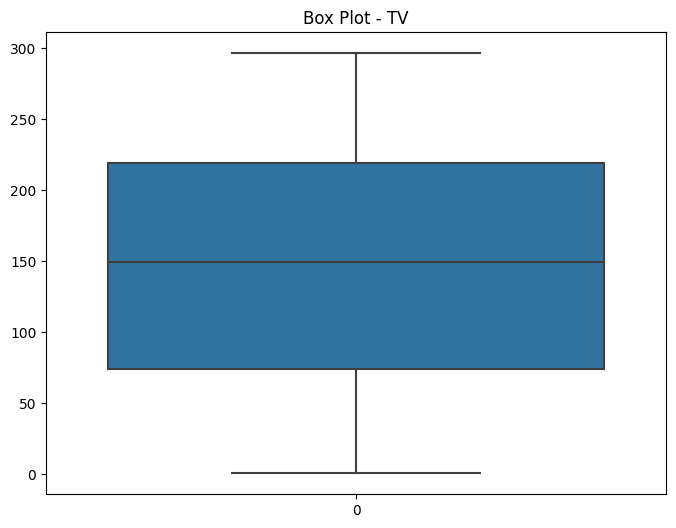

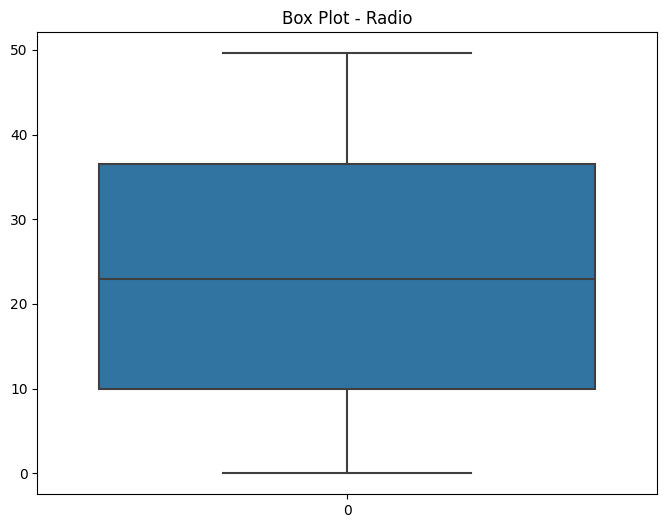

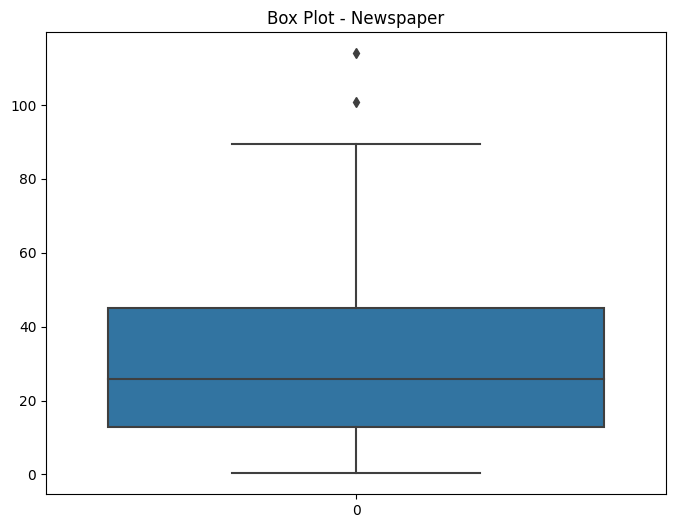

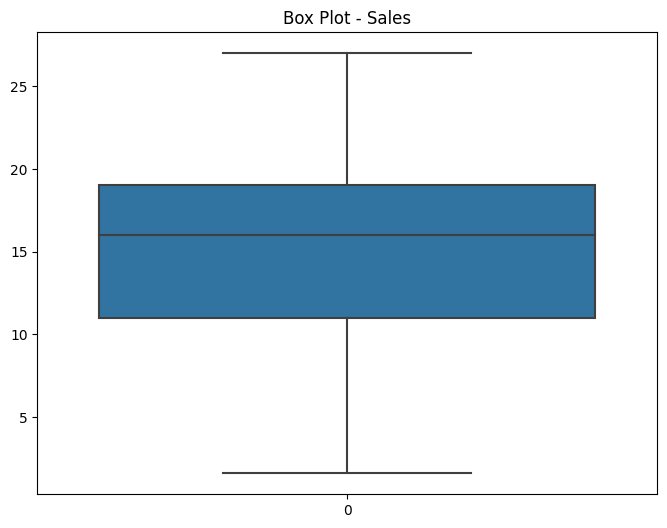

In [9]:
# Select the columns containing numerical data
numerical_columns = df.columns

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot - {column}')
    plt.show()


### Removing Outliers

In [10]:
# Newspaper Column has Outliers And Removing Outliers
q1,q2,q3 = np.percentile(df["Newspaper"],[25,50,75])
iqr = q3-q1
lower_extreme = q1-1.5*iqr
upper_extreme = q3+1.5*iqr
df = df.loc[(df["Newspaper"]>= lower_extreme) & (df["Newspaper"]<= upper_extreme)]
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [11]:
df.reset_index(drop = True,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,14.0
195,177.0,9.3,6.4,14.8
196,283.6,42.0,66.2,25.5


# Exploratory Data Analysis

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


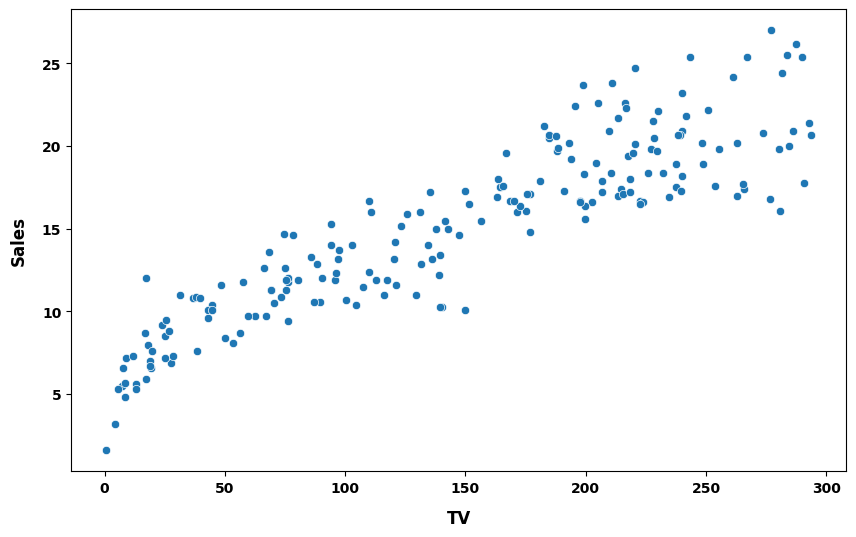

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df["TV"],y=df["Sales"])
# plt.title("Distribution Of The Sales Column", fontsize = 16,weight = "bold",pad=8)
plt.xlabel("TV",weight="bold",fontsize =12,labelpad=10)
plt.ylabel("Sales",weight="bold",fontsize =12,labelpad=10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")
plt.show()

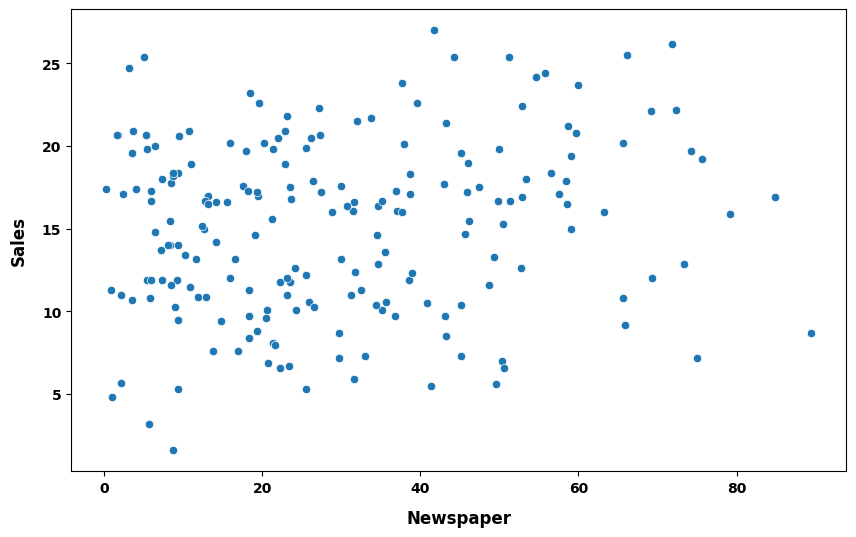

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df["Newspaper"],y=df["Sales"])
# plt.title("Distribution Of The Sales Column", fontsize = 16,weight = "bold",pad=8)
plt.xlabel("Newspaper",weight="bold",fontsize =12,labelpad=10)
plt.ylabel("Sales",weight="bold",fontsize =12,labelpad=10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")
plt.show()

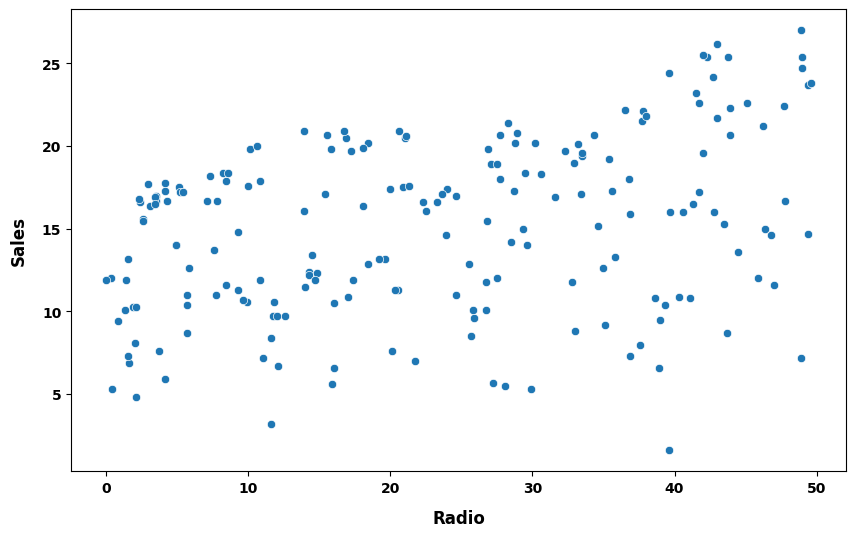

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df["Radio"],y=df["Sales"])
# plt.title("Distribution Of The Sales Column", fontsize = 16,weight = "bold",pad=8)
plt.xlabel("Radio",weight="bold",fontsize =12,labelpad=10)
plt.ylabel("Sales",weight="bold",fontsize =12,labelpad=10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")
plt.show()

### #Finding Correlation

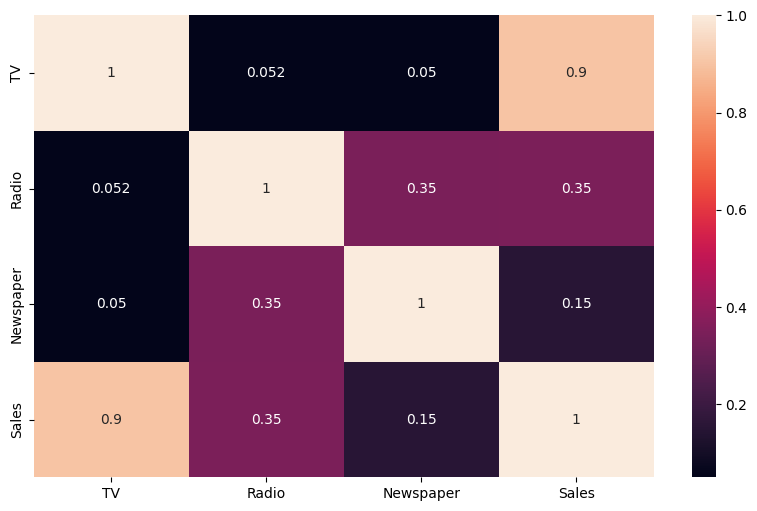

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

### #Distribution Of The Sales Column

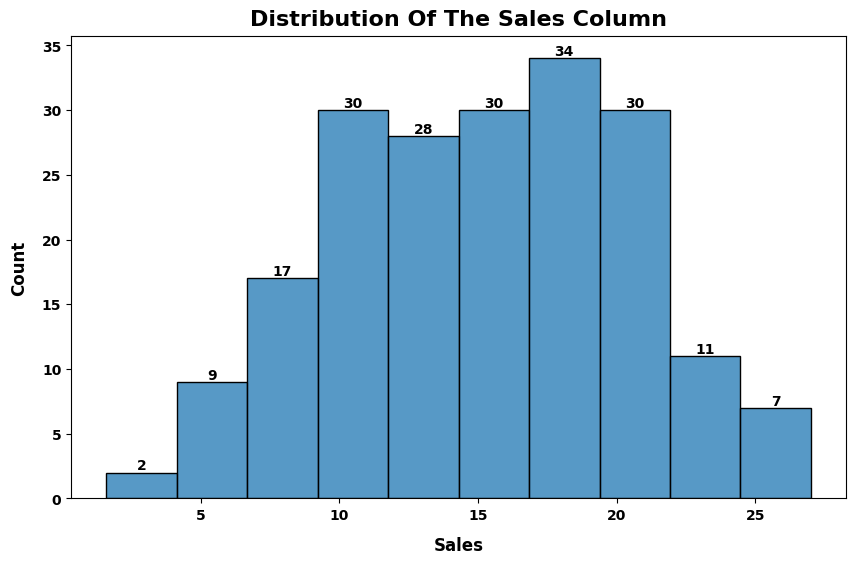

In [17]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df,x= df["Sales"])
plt.title("Distribution Of The Sales Column", fontsize = 16,weight = "bold",pad=8)
plt.xlabel("Sales",weight="bold",fontsize =12,labelpad=10)
plt.ylabel("Count",weight="bold",fontsize =12,labelpad=10)
plt.xticks(weight = "bold")
plt.yticks(weight = "bold")

for i in ax.containers:
    i.datavalues
    ax.bar_label(i,weight="bold")

plt.show()

## Model Building Part

#### #Define Dataset

In [18]:
x = df.drop(columns = "Sales", axis = 1)
y = df["Sales"]

#### #Train Test Split

In [19]:
X_train,X_text,Y_train,Y_text = train_test_split(x,y,test_size=0.2,random_state=True)

#### #Training Model

In [20]:
linearRegression =LinearRegression()
linearRegression.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_predict = linearRegression.predict(X_text)
Y_predict

array([14.90198809, 17.97306098, 21.39355855,  6.21656262, 23.35587432,
       21.07046492, 16.05766097, 15.77511824, 23.99848496, 21.71821592,
       22.38997665, 15.32693494, 19.18636469, 17.62366389,  9.70776175,
        7.23981126,  9.61195155, 24.22579697, 16.07413365, 19.52811865,
       21.07772373, 24.51140536, 16.73252093, 12.03927797, 10.11094746,
       12.57828154, 21.32882666, 10.10774998, 14.76809069, 21.41019276,
       18.94708721,  9.42755944,  7.70229519, 12.63540606, 21.80413198,
       20.7673291 ,  9.62209474, 20.38230501, 11.84153989, 15.24125957])

#### #Mean squared rrror

In [22]:
math.sqrt(mean_squared_error(Y_predict,Y_text))

1.9442009798072566

#### #Prediction Value

In [23]:
linearRegression.predict([[230.1,37.8,69.2]])

c:\Users\varsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.38904676])